CATBOOST CODE

In [1]:
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
d = pd.read_csv('pd_speech_features.csv')
x=d.drop(columns=['class','id'])
y=d['class']
 # Create a DataFrame from the dataset
df = pd.DataFrame(d)

In [3]:
df

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,250,0,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
752,250,0,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
753,251,0,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
754,251,0,0.83782,0.74890,0.49823,340,339,0.005679,0.000055,0.00092,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


In [4]:
x

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,0.000018,...,1.5466,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405
1,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,0.000016,...,1.5530,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780
2,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,0.000015,...,1.5399,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666
3,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,0.000046,...,6.9761,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603
4,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,0.000044,...,7.8832,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,0,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,0.000003,...,3.4394,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671
752,0,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,0.000006,...,19.6733,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170
753,0,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,0.000004,...,137.3126,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424
754,0,0.83782,0.74890,0.49823,340,339,0.005679,0.000055,0.00092,0.000005,...,5.4425,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131


In [5]:
x.shape

(756, 753)

In [6]:
correlation_matrix = df.corr()

In [7]:
 # Specify the name of the target variable (replace with your target variable name)
target_variable = 'class'
# Create a correlation dictionary with attribute and corresponding correlation with the target variable
correlation_dict = {}
 for col in correlation_matrix.columns:
    if col != target_variable:
        correlation_with_target = correlation_matrix[col][target_variable]
        correlation_dict[col] = correlation_with_target

In [8]:
 # Sort the correlation dictionary in descending order of correlation values
sorted_correlation_dict = dict(sorted(correlation_dict.items(), key=lambda item: item[1], reverse=True))

In [9]:
 # Print the sorted correlation dictionary
# print("Correlation dictionary with correlation values with the target variable in descending order:")
# for attribute, correlation_with_target in sorted_correlation_dict.items():
#     print(f"{attribute}: {correlation_with_target:.4f}")

In [10]:
 # Create a positive correlation dictionary with attribute and corresponding positive correlation with the target variable
positive_correlation_dict = {}
for col in correlation_matrix.columns:
    if col != target_variable:
        correlation_with_target = correlation_matrix[col][target_variable]
        if correlation_with_target > 0:
            positive_correlation_dict[col] = correlation_with_target

In [11]:
# Sort the positive correlation dictionary in descending order of correlation values 
sorted_positive_correlation_dict = dict(sorted(positive_correlation_dict.items(), key=lambda item: item[1], reverse=True))

In [12]:
# # Print the sorted positive correlation dictionary
# print("Positive Correlation dictionary with positive correlation values with the target variable in descending order:")
# for attribute, positive_correlation_with_target in sorted_positive_correlation_dict.items():
#     print(f"{attribute}: {positive_correlation_with_target:.4f}")

In [13]:
print(len(sorted_positive_correlation_dict))
selected_features = list(sorted_positive_correlation_dict.keys())
k=350

355


In [14]:
 top_k_features = selected_features[:k]
 # Load the selected features into X and the target variable into y
 X = df[top_k_features ].values
 y = df[target_variable].values
 print(len(top_k_features))

350


In [15]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
mx=MinMaxScaler()
X=mx.fit_transform(X)

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from catboost import CatBoostClassifier
# from sklearn.metrics import log_loss
# from sklearn.feature_selection import f_classif
from imblearn.over_sampling import SMOTE

In [28]:
model = CatBoostClassifier(iterations=1000,
learning_rate=0.05,depth=6,l2_leaf_reg=1,random_strength=1,border_count=128,bagging_temperature=1,od_type='Iter',od_wait=20,eval_metric='Logloss',scale_pos_weight=1.0,one_hot_max_size=255,verbose=False)


In [29]:
# Initialize the StratifiedKFold cross-validator
stratified_cv = StratifiedKFold(n_splits=5,random_state=42,shuffle=True)
 # Lists to store the accuracy scores for each fold
accuracy_scores = []
conf_matrices = []
precisions = []
recalls = []
f1_scores = []

In [38]:
 # Perform stratified cross-validation with SMOTE
 for train_index, test_index in stratified_cv.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Apply SMOTE to the training fold
    smote = SMOTE(sampling_strategy='auto',  # 'auto' or a float specifying the target ratio
    random_state=42,
    k_neighbors=5) 
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    # Train the model on the resampled training data
    model.fit(X_train_resampled, y_train_resampled)
    # Predict on the test fold (get the class labels, not probabilities)
    y_preds = model.predict(X_test)
    # Calculate accuracy for the current fold
    accuracy = accuracy_score(y_test, y_preds)
    accuracy_scores.append(accuracy)
    conf_matrix = confusion_matrix(y_test, y_preds)
    conf_matrices.append(conf_matrix)
    precision = precision_score(y_test, y_preds)
    precisions.append(precision)
    # Calculate recall for the current fold
    recall = recall_score(y_test, y_preds)
    recalls.append(recall)
    # Calculate F1-score for the current fold
    f1 = f1_score(y_test, y_preds)
    f1_scores.append(f1)

In [31]:
# Calculate the mean accuracy across all folds
mean_accuracy =np.mean(accuracy_scores)
mean_conf_matrix =np.mean(conf_matrices, axis=0)
mean_precision = np.mean(precisions)
mean_recall = np.mean(recalls)
mean_f1_score = np.mean(f1_scores)

Mean Accuracy 0.9338968281631231
Mean confuson matrix [[ 30.6   7.8]
 [  2.2 110.6]]
Mean Precision 0.9344591420979164
Mean Recall  0.9804677623261693
Mean F1-score  0.9568144445971829


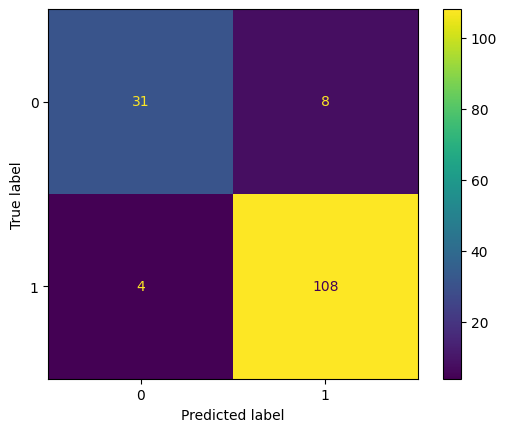

In [32]:
print("Mean Accuracy", mean_accuracy)
print("Mean confuson matrix",mean_conf_matrix)
print("Mean Precision", mean_precision)
print("Mean Recall ", mean_recall)
print( "Mean F1-score ", mean_f1_score)
print(ConfusionMatrixDisplay.from_predictions(y_true =y_test,y_pred = y_preds))

SVM CODE

In [33]:
 from sklearn.svm import SVC

In [34]:
 model = SVC(C=1.0,           # Regularization parameter. Controls the tradeoff between maximizing the margin and minimizing the classification error.
    kernel='poly',    # Kernel function: 'linear', 'poly', 'rbf' (Gaussian), 'sigmoid', etc.
    gamma='scale',   # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'. 'scale' uses 1 / (n_features * X.var()) as the default value.
    degree=3,        # Degree of the polynomial kernel function ('poly'). Ignored by other kernels.
    coef0=0.0,       # Independent term in kernel function. Used in 'poly' and 'sigmoid'.
    shrinking=True,  # Whether to use the shrinking heuristic. Can speed up training for large datasets.
    probability=False,  # Whether to enable probability estimates. Use for probability calibration.
    tol=1e-3,        # Tolerance for stopping criterion.
    class_weight=None,  # Weights associated with classes. Useful for unbalanced datasets.
    random_state=None,  # Seed for random number generator.
    verbose=False    # Verbosity of output.
 )


In [35]:
 # Initialize the StratifiedKFold cross-validator
stratified_cv = StratifiedKFold(n_splits=5,random_state=42,shuffle=True)
 # Lists to store the accuracy scores for each fold
accuracy_scores = []
conf_matrices = []
precisions = []
recalls = []
f1_scores = []

In [36]:
# Perform stratified cross-validation with SMOTE
for train_index, test_index in stratified_cv.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Apply SMOTE to the training fold
    smote = SMOTE(sampling_strategy='auto',  # 'auto' or a float specifying the target ratio
    random_state=42,
    k_neighbors=5) 
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    # Train the model on the resampled training data
    model.fit(X_train_resampled, y_train_resampled)
    # Predict on the test fold (get the class labels, not probabilities)
    y_preds = model.predict(X_test)
    # Calculate accuracy for the current fold
    accuracy = accuracy_score(y_test, y_preds)
    accuracy_scores.append(accuracy)
    conf_matrix = confusion_matrix(y_test, y_preds)
    conf_matrices.append(conf_matrix)
    precision = precision_score(y_test, y_preds)
    precisions.append(precision)
    # Calculate recall for the current fold
    recall = recall_score(y_test, y_preds)
    recalls.append(recall)
    # Calculate F1-score for the current fold
    f1 = f1_score(y_test, y_preds)
    f1_scores.append(f1)

Mean Accuracy 0.8148048100383407
Mean confuson matrix [[30.2  8.2]
 [19.8 93. ]]
Meanprecison 0.9193344645550529
Mean Recall  0.8244469026548673
Mean F1-score  0.8691387866034995


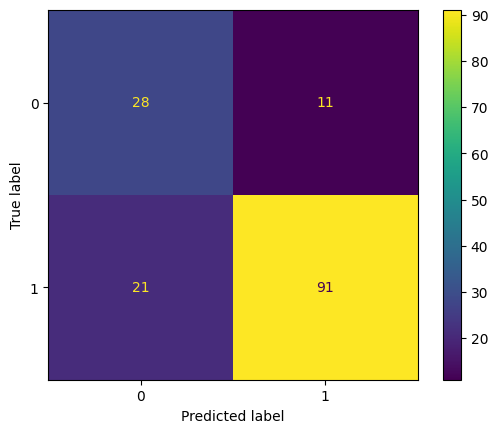

In [37]:
# Calculate the mean accuracy across all folds
mean_accuracy = np.mean(accuracy_scores)
mean_conf_matrix = np.mean(conf_matrices, axis=0)
mean_precision = np.mean(precisions)
mean_recall = np.mean(recalls)
mean_f1_score = np.mean(f1_scores)
print("Mean Accuracy", mean_accuracy)
print("Mean confuson matrix",mean_conf_matrix)
print("Meanprecison", mean_precision)
print("Mean Recall ", mean_recall)
print("Mean F1-score ", mean_f1_score)
print(ConfusionMatrixDisplay.from_predictions(y_true = y_test, y_pred = y_preds))

RANDOM FOREST

In [39]:
 from sklearn.ensemble import RandomForestClassifier

In [46]:
 model = RandomForestClassifier(n_estimators=100,  # Number of trees in the forest
    criterion='gini',  # Split quality criterion ('gini' or 'entropy')
    max_depth=None,    # Maximum depth of the tree
    min_samples_split=2,  # Minimum samples required to split an internal node
    min_samples_leaf=1,   # Minimum samples required to be at a leaf node
    max_features='sqrt',  # Number of features to consider when looking for the best split
    bootstrap=True,       # Whether to bootstrap samples when building trees
    random_state=42,      # Seed for random number generator
    n_jobs=-1             # Number of CPU cores to use for parallelization (-1 uses all available cores)
)

In [47]:
 # Initialize the StratifiedKFold cross-validator
stratified_cv = StratifiedKFold(n_splits=5,random_state=42,shuffle=True)
 # Lists to store the accuracy scores for each fold
accuracy_scores = []
conf_matrices = []
precisions = []
recalls = []
f1_scores = []

In [48]:
 # Perform stratified cross-validation with SMOTE
for train_index, test_index in stratified_cv.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Apply SMOTE to the training fold
    smote = SMOTE(sampling_strategy='auto',random_state=42,k_neighbors=5) 
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    # Train the model on the resampled training data
    model.fit(X_train_resampled, y_train_resampled)
    # Predict on the test fold (get the class labels, not probabilities)
    y_preds = model.predict(X_test)
    
    # Calculate accuracy for the current fold
    accuracy = accuracy_score(y_test, y_preds)
    accuracy_scores.append(accuracy)
    conf_matrix = confusion_matrix(y_test, y_preds)
    conf_matrices.append(conf_matrix)
    precision = precision_score(y_test, y_preds)
    precisions.append(precision)
    # Calculate recall for the current fold
    recall = recall_score(y_test, y_preds)
    recalls.append(recall)
    # Calculate F1-score for the current fold
    f1 = f1_score(y_test, y_preds)
    f1_scores.append(f1)

Mean Accuracy 0.8955298013245034
Mean confuson matrix [[ 28.6   9.8]
 [  6.  106.8]]
Meanprecison 0.9161251988354413
Mean Recall  0.9467762326169407
Mean F1-score  0.9310509852360074


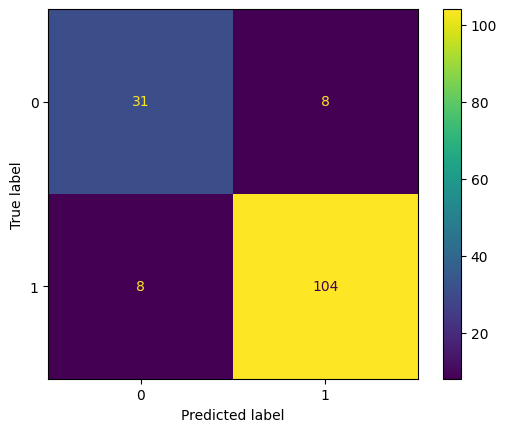

In [49]:
# Calculate the mean accuracy across all folds
mean_accuracy = np.mean(accuracy_scores)
mean_conf_matrix = np.mean(conf_matrices, axis=0)
mean_precision = np.mean(precisions)
mean_recall = np.mean(recalls)
mean_f1_score = np.mean(f1_scores)
print("Mean Accuracy", mean_accuracy)
print("Mean confuson matrix",mean_conf_matrix)
print("Meanprecison", mean_precision)
print("Mean Recall ", mean_recall)
print("Mean F1-score ", mean_f1_score)
print(ConfusionMatrixDisplay.from_predictions(y_true = y_test,y_pred = y_preds))


In [51]:
from xgboost import XGBClassifier

In [56]:
 # Initialize the XGBoost classifier
model = XGBClassifier(n_estimators=100,  # Number of boosting rounds
                      max_depth=6,       # Maximum depth of a tree
                      learning_rate=0.1,  # Learning rate (shrinkage)
                      # use_label_encoder=False,
                      eval_metric='mlogloss',  # Evaluation metric
                      random_state=42,   # Seed for random number generator
                      n_jobs=-1)         # Number of CPU cores to use for parallelization

Mean Accuracy: 0.9008191007319624
Mean Confusion Matrix:
 [[ 28.8   9.6]
 [  5.4 107.4]]
Mean Precision: 0.9184837099608434
Mean Recall: 0.952085967130215
Mean F1-score: 0.9347727583317804


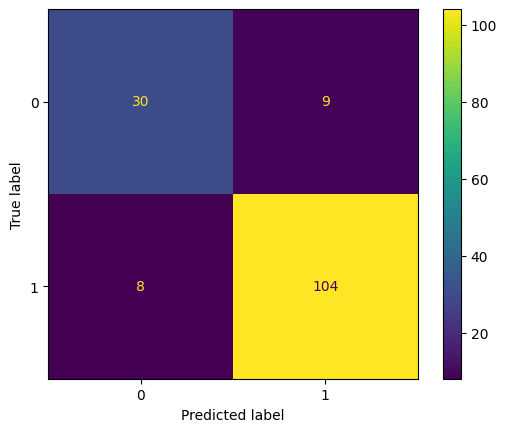

In [57]:
# Initialize the StratifiedKFold cross-validator
stratified_cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Lists to store metrics for each fold
accuracy_scores = []
conf_matrices = []
precisions = []
recalls = []
f1_scores = []

# Perform stratified cross-validation with SMOTE
for train_index, test_index in stratified_cv.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Apply SMOTE to the training fold
    smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=5) 
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    
    # Train the XGBoost model on the resampled training data
    model.fit(X_train_resampled, y_train_resampled)
    
    # Predict on the test fold
    y_preds = model.predict(X_test)
    
    # Calculate metrics for the current fold
    accuracy = accuracy_score(y_test, y_preds)
    accuracy_scores.append(accuracy)
    
    conf_matrix = confusion_matrix(y_test, y_preds)
    conf_matrices.append(conf_matrix)
    
    precision = precision_score(y_test, y_preds)
    precisions.append(precision)
    
    recall = recall_score(y_test, y_preds)
    recalls.append(recall)
    
    f1 = f1_score(y_test, y_preds)
    f1_scores.append(f1)

# Calculate mean metrics across all folds
mean_accuracy = np.mean(accuracy_scores)
mean_conf_matrix = np.mean(conf_matrices, axis=0)
mean_precision = np.mean(precisions)
mean_recall = np.mean(recalls)
mean_f1_score = np.mean(f1_scores)

# Print the results
print("Mean Accuracy:", mean_accuracy)
print("Mean Confusion Matrix:\n", mean_conf_matrix)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1_score)

# Display the confusion matrix for the last fold
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds)